## Parsing unity VR log file using functions in the locproc module

In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
# If you want to import files from the parent directory, please add the directory to the path:
#import sys, os, inspect
#currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
#parentdir = os.path.dirname(currentdir)
#sys.path.insert(0, os.path.dirname(parentdir))
#print(sys.path)

In [4]:
from unityvr.preproc import logproc
from unityvr.viz import viz

In [5]:
dirName = "../sample/"
fileName = 'Log_2021-07-26_18-38-22_DL_f07_behav_panA1_t01.json'

dat = logproc.openUnityLog(dirName, fileName)

for i in range(5):
    print(dat[i]['frame'])
    print(json.dumps(dat[i], sort_keys=True, indent=4))

239.0
{
    "frame": 239.0,
    "frameAfterSplash": 239.0,
    "headerNotes": "~expid:stripe_fix_combo3_A1_t01 ~experiment:projectors on, panorama test, 120 Hz frame rate ~genotype:DL ~flyid:f07 ~sex:f ~age:4-7d ~notes:stripe fixation pilot ~trial:01                                                                            ",
    "timeSecs": 1.994660496711731,
    "timeSecsAfterSplash": 1.994660496711731
}
239.0
{
    "frame": 239.0,
    "frameAfterSplash": 239.0,
    "sessionParameters": [
        "timeoutSecs: 485",
        "backgroundCylinderTexture: C:\\Users\\zhangy6\\Panoromas\\A1_darkSpot.png"
    ],
    "timeSecs": 1.994660496711731,
    "timeSecsAfterSplash": 1.994660496711731
}
239.0
{
    "frame": 239.0,
    "frameAfterSplash": 0.0,
    "heightPixels": 1280,
    "refreshRateHz": 120,
    "timeSecs": 1.994660496711731,
    "timeSecsAfterSplash": 0.0,
    "widthPixels": 720
}
242.0
{
    "ficTracBallRadius": 0.4410000145435333,
    "ficTracServerAddress": "127.0.0.1",
    "fi

### Construct data object from log file
#### Extract header info

In [6]:
print(dat[0]['headerNotes'])
logproc.makeMetaDict(dat, fileName)

~expid:stripe_fix_combo3_A1_t01 ~experiment:projectors on, panorama test, 120 Hz frame rate ~genotype:DL ~flyid:f07 ~sex:f ~age:4-7d ~notes:stripe fixation pilot ~trial:01                                                                            


{'expid': 'stripe_fix_combo3_A1_t01',
 'experiment': 'projectors on, panorama test, 120 Hz frame rate',
 'genotype': 'DL',
 'sex': 'f',
 'flyid': 'f07',
 'trial': 'trial01',
 'date': '2021-07-26',
 'time': '18-38-22',
 'ballRad': 0.4410000145435333,
 'setFrameRate': 120,
 'notes': 'stripe fixation pilot'}

#### Pull out object positions as pandas dataframe

In [7]:
objDf = logproc.objDfFromLog(dat)
objDf.head()

,name,collider,px,py,pz,rx,ry,rz,sx,sy,sz
0,BackgroundCylinder/default,NA,0.0,0.0,0.01,0.0,0.0,0.0,-2.9,2.9,12.56
1,Fly/FlyCamera1/FlyCamera1Screen,MeshCollider,1.177997,4.277996,3.0106,0.0,0.0,225.0,12.1,1.0,18.0
2,Fly/FlyCamera2/FlyCamera2Screen,MeshCollider,1.177997,-4.277998,3.0106,0.0,0.0,315.0,12.100002,1.0,18.0


#### Pull out fly position as pandas dataframe
Position in VR

In [8]:
posDf, ftDf, tsDf = logproc.timeseriesDfFromLog(dat)

No analog input data was recorded.


In [9]:
print(len(posDf))
posDf.head()

58046


,frame,time,dt,x,y,angle,dx,dy,dxattempt,dyattempt
0,242.0,0.000000,0.008325,0.004551,-0.011155,359.694916,0.004551,-0.011155,0.004551,-0.011155
1,243.0,0.333333,0.333333,0.006799,-0.007923,359.647186,0.002265,0.003220,0.002265,0.003220
2,244.0,0.347022,0.013689,0.003864,-0.011485,359.857330,-0.002956,-0.003544,-0.002956,-0.003544
3,245.0,0.351964,0.004942,0.004857,-0.012859,359.839508,0.000990,-0.001377,0.000990,-0.001377
4,246.0,0.356793,0.004829,0.004857,-0.012859,359.839508,0.000000,0.000000,0.000000,0.000000


In [10]:
# Extract ball radius
matching = [s for s in dat if "ficTracBallRadius" in s]
ballRadius = matching[0]["ficTracBallRadius"]
print(ballRadius) # in decimeters

#conversion factor to cm
dc2cm = 10

0.4410000145435333


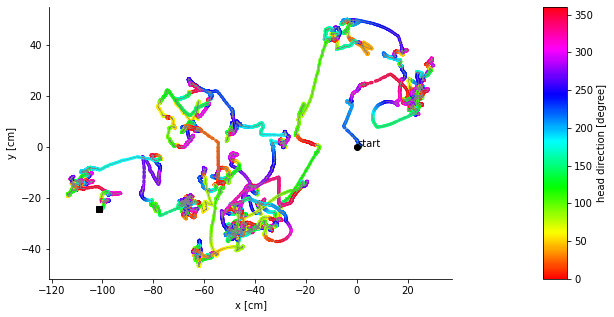

In [11]:
fig, axs = plt.subplots(1,2,figsize=(10,5), gridspec_kw={'width_ratios':[20,1]})
axs[0].plot(posDf.x*dc2cm,posDf.y*dc2cm,color='grey', linewidth=0.5)
cb = axs[0].scatter(posDf.x*dc2cm,posDf.y*dc2cm,s=5,c=posDf.angle, cmap='hsv')
axs[0].plot(posDf.x[0]*dc2cm,posDf.y[0]*dc2cm,'ok')
axs[0].text(posDf.x[0]*dc2cm+0.2,posDf.y[0]*dc2cm+0.2,'start')
axs[0].plot(posDf.x.values[-1]*dc2cm,posDf.y.values[-2]*dc2cm,'sk')
axs[0].set_aspect('equal')
axs[0].set_xlabel('x [cm]')
axs[0].set_ylabel('y [cm]')
viz.myAxisTheme(axs[0])
plt.colorbar(cb,cax=axs[1], label='head direction [degree]')

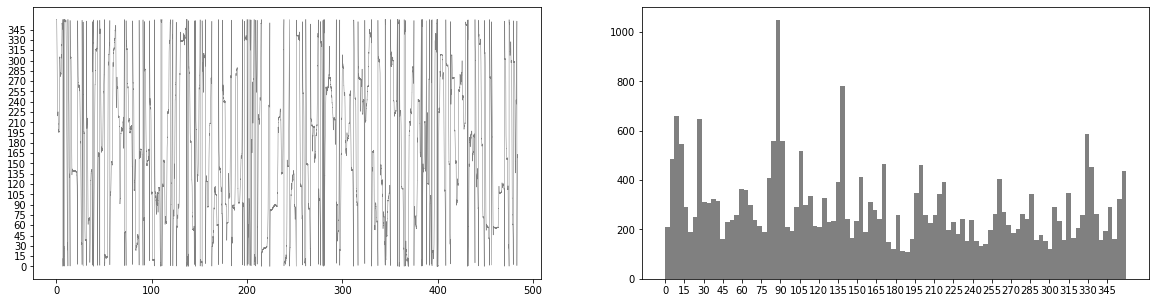

In [12]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(posDf.time,posDf.angle,color='grey', linewidth=0.5)
axs[0].set_yticks(np.arange(0, 360, 15));
axs[1].hist(posDf.angle[0:round(len(posDf.angle)/2)],color='grey', bins=100)
axs[1].set_xticks(np.arange(0, 360, 15));

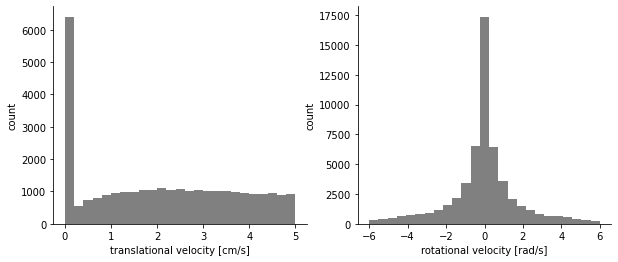

In [13]:
vt = np.hypot(posDf.dx*dc2cm, posDf.dy*dc2cm)/posDf.dt
vr = np.diff(posDf.angle*np.pi/180)/posDf.dt[1:]
fig, axs = plt.subplots(1,2,figsize=(10,4), gridspec_kw={'width_ratios':[1,1]})
axs[0].hist(vt,color='grey',bins=25, range=(0,5));
axs[0].set_xlabel('translational velocity [cm/s]')
axs[0].set_ylabel('count')
axs[1].hist(vr,color='grey',bins=25,range=(-6,6));
axs[1].set_xlabel('rotational velocity [rad/s]')
axs[1].set_ylabel('count')
for ax in axs:
    viz.myAxisTheme(ax)

Position based on Fictrac tracking

In [14]:
print(len(ftDf))
ftDf.head()

68053


,frame,ficTracTReadMs,ficTracTWriteMs,dx,dy,dz
0,242.0,0.0,0.0,-0.030546,0.006810,-0.014252
1,242.0,2.0,6100301.0,-0.025016,-0.008336,-0.012993
2,242.0,8.0,12200806.0,-0.021725,-0.006283,-0.010577
3,242.0,15.0,18301271.0,0.033073,-0.004688,0.017936
4,242.0,24.0,30501668.0,0.009983,0.014753,0.021437


Photodiode signal and frame rate dataframe

In [15]:
print(len(tsDf))
tsDf.head()

58046


,frame,time,dt,x,y,angle,dx,dy,dxattempt,dyattempt
0,242.0,0.000000,0.008325,0.004551,-0.011155,359.694916,0.004551,-0.011155,0.004551,-0.011155
1,243.0,0.333333,0.333333,0.006799,-0.007923,359.647186,0.002265,0.003220,0.002265,0.003220
2,244.0,0.347022,0.013689,0.003864,-0.011485,359.857330,-0.002956,-0.003544,-0.002956,-0.003544
3,245.0,0.351964,0.004942,0.004857,-0.012859,359.839508,0.000990,-0.001377,0.000990,-0.001377
4,246.0,0.356793,0.004829,0.004857,-0.012859,359.839508,0.000000,0.000000,0.000000,0.000000


In [16]:
framesDf = tsDf[['frame','time','dt']].drop_duplicates().reset_index(level=0)[['frame','time','dt']]

In [17]:
framesDf.head()

,frame,time,dt
0,242.0,0.000000,0.008325
1,243.0,0.333333,0.333333
2,244.0,0.347022,0.013689
3,245.0,0.351964,0.004942
4,246.0,0.356793,0.004829


Fictrac updates come in at a higher rate than the VR frame rate. Fictrac can also only run for a subset of the VR run time and therefore the number of frames in fictrac and vr dataframes may not match.

#### Frame rate

In [18]:
# Extract frame rate setting
matching = [s for s in dat if "refreshRateHz" in s]
forceframerate = matching[0]["refreshRateHz"]
print(forceframerate) # frame rate in Hz

120


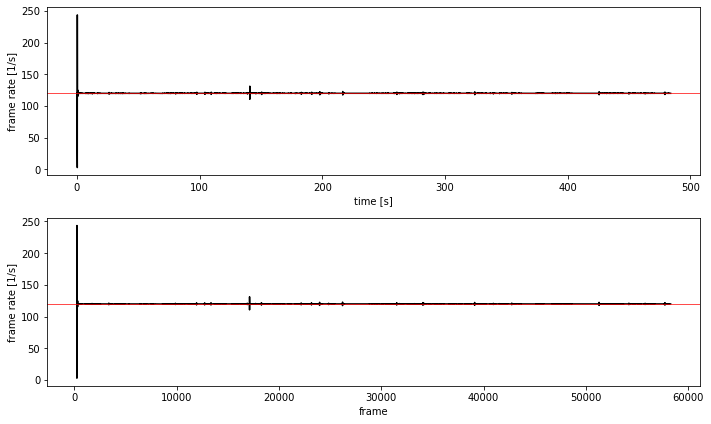

In [19]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(framesDf.time, 1/framesDf.dt, 'k')
ax[1].plot(framesDf.frame, 1/framesDf.dt, 'k')
ax[0].set_xlabel('time [s]')
ax[1].set_xlabel('frame');
for i in range(2):
    ax[i].axhline(forceframerate,0,1,color='r', linewidth=0.7)
    ax[i].set_ylabel('frame rate [1/s]')
fig.tight_layout()

#####  Note: The remaining visuzalizations require that an analog photodiode signal was recorded. 

In [27]:
if "pdSig" in tsDf.columns:
    fig, ax = plt.subplots(2,1, figsize=(10,6))
    window = 200
    for i, ts in enumerate([0,5000]):
        ax[i].plot(range(window),tsDf.pdsig[ts:ts+window],'-',color='grey',linewidth=0.5)

        even = tsDf[ts:ts+window][tsDf['frame'][ts:ts+window]%2==1]
        ax[i].plot(np.arange(window)[tsDf['frame'][ts:ts+window].values%2==1], even.pdsig, 'b.', label='even frame')

        odd = tsDf[ts:ts+window][tsDf['frame'][ts:ts+window]%2==0]
        ax[i].plot(np.arange(window)[tsDf['frame'][ts:ts+window].values%2==0], odd.pdsig, 'c.', label=
                  'odd frame')

        ax[i].set_xlabel('time [s]')
        ax[i].set_ylabel('photo diode signal')
        ax[i].set_xlabel('sample');
    ax[0].legend()
    fig.tight_layout()

In [29]:
if "pdSig" in tsDf.columns:
    fig, ax = plt.subplots(1,1, figsize=(10,4))
    for f in range(1000,1005):
        sig = tsDf.query('frame == '+str(float(f)))
        ax.plot(range(len(sig.pdsig)), sig.pdsig, '.-',  label='frame{}'.format(f))
    ax.legend()

Compute frame rate from photodiode signal

In [30]:
if "pdSig" in tsDf.columns:
    from scipy.signal import medfilt

    tsDf["pdFilt"]  = tsDf.pdsig.values
    tsDf.pdFilt[np.isfinite(tsDf.pdsig)] = medfilt(tsDf.pdsig[np.isfinite(tsDf.pdsig)])
    tsDf["pdThresh"]  = 1*(np.asarray(tsDf.pdFilt>=0.2+np.nanmedian(tsDf.pdFilt.values)))

Generate interpolated time

In [31]:
from scipy import interpolate

tsDf['framestart'] = np.hstack([0,1*np.diff(tsDf.time)>0])

tsDf['counts'] = 1
sampperframe = tsDf.groupby('frame').sum()[['time','dt','counts']].reset_index(level=0)
sampperframe['fs'] = sampperframe.counts/sampperframe.dt

frameStartIndx = np.hstack((0,np.where(tsDf.framestart)[0]))
frameStartIndx = np.hstack((frameStartIndx, frameStartIndx[-1]+sampperframe.counts.values[-1]-1))
frameIndx = tsDf.index.values

frameNums = tsDf.frame[frameStartIndx].values.astype('int')
frameNumsInterp = np.hstack((frameNums, frameNums[-1]+1))

timeAtFramestart = tsDf.time[frameStartIndx].values

#generate interpolated frames
frameinterp_f = interpolate.interp1d(frameStartIndx,frameNums)
tsDf['frameinterp'] = frameinterp_f(frameIndx)

timeinterp_f = interpolate.interp1d(frameStartIndx,timeAtFramestart)
tsDf['timeinterp'] = timeinterp_f(frameIndx)

In [33]:
if "pdSig" in tsDf.columns:
    fig, ax = plt.subplots(4,1, figsize=(10,10))
    ts = 1000
    wind = 300
    ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdsig[ts:ts+wind], 'k')
    ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdFilt[ts:ts+wind], 'c')
    ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdThresh[ts:ts+wind], '--',color='orange')
    ax[0].set_ylabel('photodiode signal [V]')
    ax[0].set_xlabel('time [s]')

    pdChange = np.hstack((0,np.diff(tsDf.pdThresh)))
    pdChangeT = tsDf.timeinterp.values[abs( pdChange )>0]

    ax[1].plot(tsDf.timeinterp, tsDf.pdsig, 'k')
    #ax[1].set_ylim(0,250)
    ax[1].set_xlabel('time [s]')
    ax[1].set_ylabel('photodiode signal [V]')

    ax[2].plot(pdChangeT[1:], 1/np.diff(pdChangeT), '.', color='grey')
    #ax[2].set_ylim(0,250)
    ax[2].axhline(forceframerate,0,1,color='r', linewidth=0.7)
    ax[2].set_xlabel('time [s]')
    ax[2].set_ylabel('photodiode-based\nframe rate [1/s]')

    ax[3].hist(1/np.diff(pdChangeT), 100, color='grey')
    ax[3].set_xlim(0,250)
    ax[3].axvline(forceframerate,0,1,color='r', linewidth=0.7)
    ax[3].set_ylabel('count')
    ax[3].set_xlabel('photodiode-based frame rate [1/s]')

    fig.tight_layout()